In [13]:
import os 
import time as tm
import numpy as np 
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense 
from keras.layers import Activation
from scipy.stats import pearsonr
import matplotlib.image as mpimg
import seaborn as sns 
import matplotlib.pyplot as plt
import cv2 #pip install opencv-python

class Net():
    def __init__(self, data):
      self.X_train = self.y_train = self.X_test = self.y_test = pd.DataFrame()
      self.Model = None
      (self.X_train, self.y_train), (self.X_test, self.y_test) = mnist.load_data()
      temp = []
      for i in range(len(self.y_train)):
        temp.append(to_categorical(self.y_train[i], num_classes=10))
      self.y_train = np.array(temp)
      temp = []
      for i in range(len(self.y_test)):
        temp.append(to_categorical(self.y_test[i], num_classes=10))
      self.y_test = np.array(temp)
      self.model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10),
          keras.layers.Activation('softmax')
      ])
      self.model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(
          0.001), metrics=['accuracy'])
      self.model.summary()
      self.previous_epoch = self.model.fit(
          self.X_train, self.y_train, epochs=100, validation_data=(self.X_test, self.y_test))

    def predict(self, data):
          return self.model.predict(data)

In [14]:
data = mnist.load_data()
neural_net = Net(data)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
 activation_4 (Activation)   (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5128 - accuracy: 0.8537 - val_loss: 0.5273 - val_accuracy: 0.8807
Epoch 2/100
1875/1875 [============

313/313 [==============================] - 0s 1ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 ... 1.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 1.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 1.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [0.000000e+00 4.731436e-32 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]
[7 2 1 ... 4 5 6]


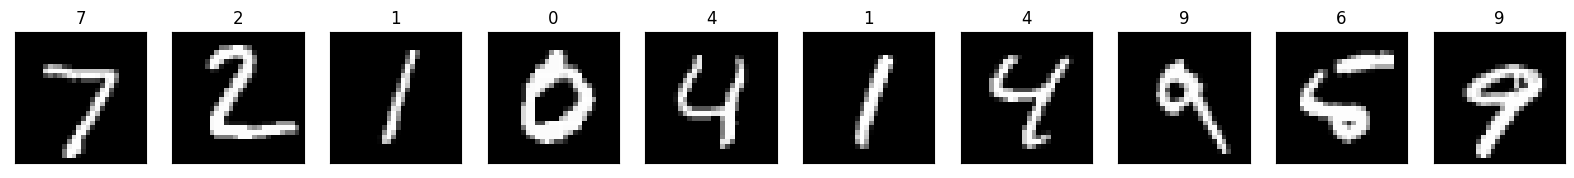

In [15]:
predictions = neural_net.predict(neural_net.X_test)
print(predictions)
predictions = np.argmax(predictions, axis=1)
print(predictions)
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(neural_net.X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()
